In [1]:
import librosa
import IPython.display as ipd 
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Amplitude')

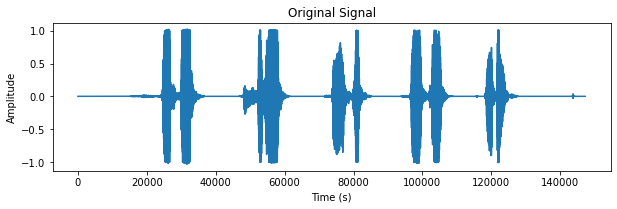

In [2]:
y,sr = librosa.load('Lab_3_Saumik.wav')
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

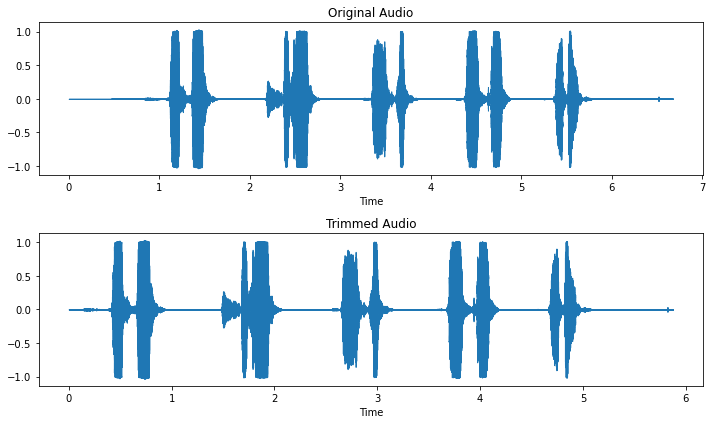

In [3]:
#A1
trimmed_y, index = librosa.effects.trim(y)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')

plt.subplot(2, 1, 2)
librosa.display.waveshow(trimmed_y, sr=sr)
plt.title('Trimmed Audio')

plt.tight_layout()
plt.show()

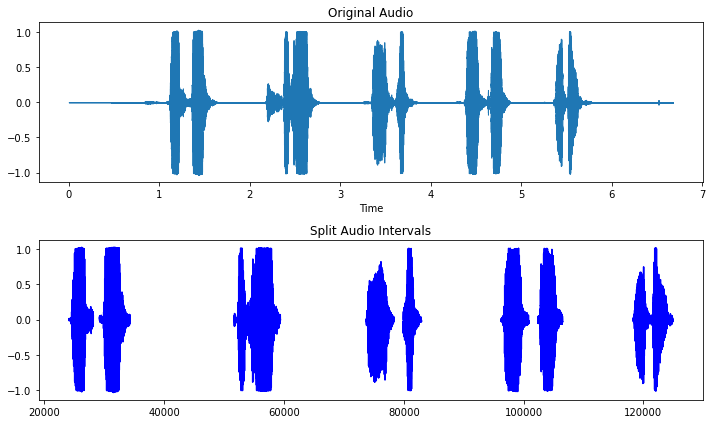

In [4]:
#A2
import soundfile as sf

top_db = 20

intervals = librosa.effects.split(y, top_db=top_db)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')

plt.subplot(2, 1, 2)

for interval in intervals:
    start, end = interval
    plt.plot(range(start, end), y[start:end], color='blue')

plt.title('Split Audio Intervals')

plt.tight_layout()
plt.show()

In [7]:
# Save and listen to each split interval
for i, interval in enumerate(intervals):
    start, end = interval
    split_audio = y[start:end]
    split_audio_path = f"audio_{i+1}.wav"
    sf.write(split_audio_path, split_audio, sr)

# You can now listen to the generated split audio files and observe the split quality.
